Step 1: Import required libraries

In [1]:
# importing the libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# version of tensorflow
print(tf.__version__)

2.7.0


Step 2: Load and prepair the dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


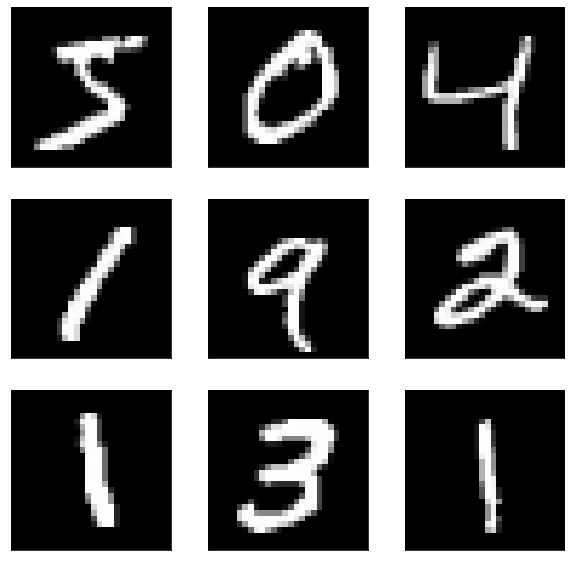

In [4]:
# visualizing a few images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [5]:
# shape of the training and test set
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [6]:
# reshaping the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# one hot encoding the target variable
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<h2>Step 3: Build/Train the model</h2>

In [7]:
# defining the model architecture
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [9]:
# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model for 10 epochs.

In [10]:
# training the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5667 - accuracy: 0.8261 - val_loss: 0.2894 - val_accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2544 - accuracy: 0.9229 - val_loss: 0.1970 - val_accuracy: 0.9406
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1844 - accuracy: 0.9446 - val_loss: 0.1457 - val_accuracy: 0.9563
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1514 - accuracy: 0.9542 - val_loss: 0.1189 - val_accuracy: 0.9648
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1315 - accuracy: 0.9601 - val_loss: 0.1156 - val_accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1180 - accuracy: 0.9643 - val_loss: 0.1068 - val_accuracy: 0.9679
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1072 - accuracy: 0.9673 - val_loss: 0.0952 -

<h2>Step 5: Link your recourses</h2>


[https://www.analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2020/07/how-to-train-an-image-classification-model-in-pytorch-and-tensorflow/)